<a href="https://colab.research.google.com/github/Rendy3001/SemesterProject/blob/main/RecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing datasets and performing exploratory data analysis

We will work with a Food Nutrition Dataset.

Food Nutrition Dataset is a comprehensive Nutritional Food Database, provides detailed nutritional information for a wide range of food items commonly consumed around the world. This dataset aims to support dietary planning, nutritional analysis, and educational purposes by providing extensive data on the macro and micronutrient content of foods.

Our aim is to investigate contents of this dataset and create a user friendly solution to help with dietary retrictions and choices.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
group1 = pd.read_csv('https://raw.githubusercontent.com/Rendy3001/SemesterProject/main/FOOD-DATA-GROUP1.csv')
group2 = pd.read_csv('https://raw.githubusercontent.com/Rendy3001/SemesterProject/main/FOOD-DATA-GROUP2.csv')
group3 = pd.read_csv('https://raw.githubusercontent.com/Rendy3001/SemesterProject/main/FOOD-DATA-GROUP3.csv')
group4 = pd.read_csv('https://raw.githubusercontent.com/Rendy3001/SemesterProject/main/FOOD-DATA-GROUP4.csv')
group5 = pd.read_csv('https://raw.githubusercontent.com/Rendy3001/SemesterProject/main/FOOD-DATA-GROUP5.csv')

In [3]:
#Combining individual datasets into one comprehensive dataset
pd.concat([group1, group2, group3, group4, group5], ignore_index=True).to_csv('food_data.csv', index=False)

In [4]:
#Loading data
food_data = pd.read_csv('food_data.csv')

In [ ]:
#Checking the data
food_data.head()

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,cream cheese,51,5.000,2.900,1.300,0.200,0.8,0.500,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,1,1,neufchatel cheese,215,19.400,10.900,4.900,0.800,3.1,2.700,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,2,2,requeijao cremoso light catupiry,49,3.600,2.300,0.900,0.000,0.9,3.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,3,3,ricotta cheese,30,2.000,1.300,0.500,0.002,1.5,0.091,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,4,4,cream cheese low fat,30,2.300,1.400,0.600,0.042,1.2,0.900,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,717,717,jews ear,25,0.095,0.000,0.000,0.000,6.7,0.000,...,15.800,0.400,0.600,24.800,0.040,13.900,42.6,0.034,0.700,24.249
2391,718,718,enoki mushrooms,1,0.099,0.027,0.000,0.010,0.2,0.034,...,0.000,0.000,0.099,0.034,0.500,0.015,3.2,10.800,0.096,0.433
2392,719,719,morel mushrooms,4,0.070,0.056,0.031,0.007,0.7,0.096,...,0.000,5.500,0.056,1.600,2.500,0.060,25.0,53.000,0.069,1.727
2393,720,720,portabella mushrooms raw,19,0.300,0.036,0.016,0.100,3.3,2.200,...,2.600,0.200,0.300,0.000,0.092,92.900,313.0,0.015,0.500,9.400


#Exploratory data analysis

In [5]:
#Dropping irrelevant columns
food_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [ ]:
#Checking whether columns Unnamed: 0 and Unnamed: 0.1 got dropped
food_data.head()

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


In [ ]:
#Cechking columns in the dataset
food_data.columns

Index(['food', 'Caloric Value', 'Fat', 'Saturated Fats',
       'Monounsaturated Fats', 'Polyunsaturated Fats', 'Carbohydrates',
       'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water',
       'Vitamin A', 'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2',
       'Vitamin B3', 'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Vitamin D',
       'Vitamin E', 'Vitamin K', 'Calcium', 'Copper', 'Iron', 'Magnesium',
       'Manganese', 'Phosphorus', 'Potassium', 'Selenium', 'Zinc',
       'Nutrition Density'],
      dtype='object')

In [ ]:
#Checking descriptive statistics of the dataset
food_data.describe()

,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
count,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,...,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000
mean,223.769520,10.176276,3.924917,4.133622,2.152844,18.589021,4.457459,13.400777,2.235790,62.171937,...,52.047728,9.581689,1.853271,34.429792,5.349964,156.236052,303.833939,52.258006,1.579192,106.929006
std,384.728244,29.008915,19.502262,12.939587,7.145738,29.406134,13.339929,32.294246,5.404483,385.352876,...,115.933379,69.912400,5.155650,71.927990,21.005332,333.257099,589.507589,199.257203,4.937509,173.023891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.500000,0.300000,0.064000,0.058000,0.071000,0.500000,0.000000,0.800000,0.000000,0.000000,...,0.600000,0.040000,0.100000,1.500000,0.037000,0.800000,27.750000,0.016000,0.055000,16.876500
50%,117.000000,2.100000,0.500000,0.500000,0.400000,6.800000,0.086000,3.500000,0.200000,0.000000,...,13.900000,0.100000,0.600000,10.400000,0.200000,42.300000,112.300000,0.053000,0.300000,53.840000
75%,258.000000,9.400000,2.700000,3.400000,1.700000,25.050000,3.200000,13.300000,2.200000,26.450000,...,48.250000,0.400000,1.800000,36.950000,0.700000,171.350000,340.500000,0.090000,1.200000,135.074500
max,6077.000000,550.700000,672.000000,291.100000,188.000000,390.200000,291.500000,560.300000,76.500000,10509.000000,...,1283.500000,1890.000000,121.200000,921.600000,451.000000,5490.000000,11336.900000,3308.000000,147.300000,3911.400000


In [ ]:
#Checking columns names, values and data types
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   food                  2395 non-null   object 
 1   Caloric Value         2395 non-null   int64  
 2   Fat                   2395 non-null   float64
 3   Saturated Fats        2395 non-null   float64
 4   Monounsaturated Fats  2395 non-null   float64
 5   Polyunsaturated Fats  2395 non-null   float64
 6   Carbohydrates         2395 non-null   float64
 7   Sugars                2395 non-null   float64
 8   Protein               2395 non-null   float64
 9   Dietary Fiber         2395 non-null   float64
 10  Cholesterol           2395 non-null   float64
 11  Sodium                2395 non-null   float64
 12  Water                 2395 non-null   float64
 13  Vitamin A             2395 non-null   float64
 14  Vitamin B1            2395 non-null   float64
 15  Vitamin B11          

In [6]:
#Checking for duplicates
food_data.duplicated().sum()

0

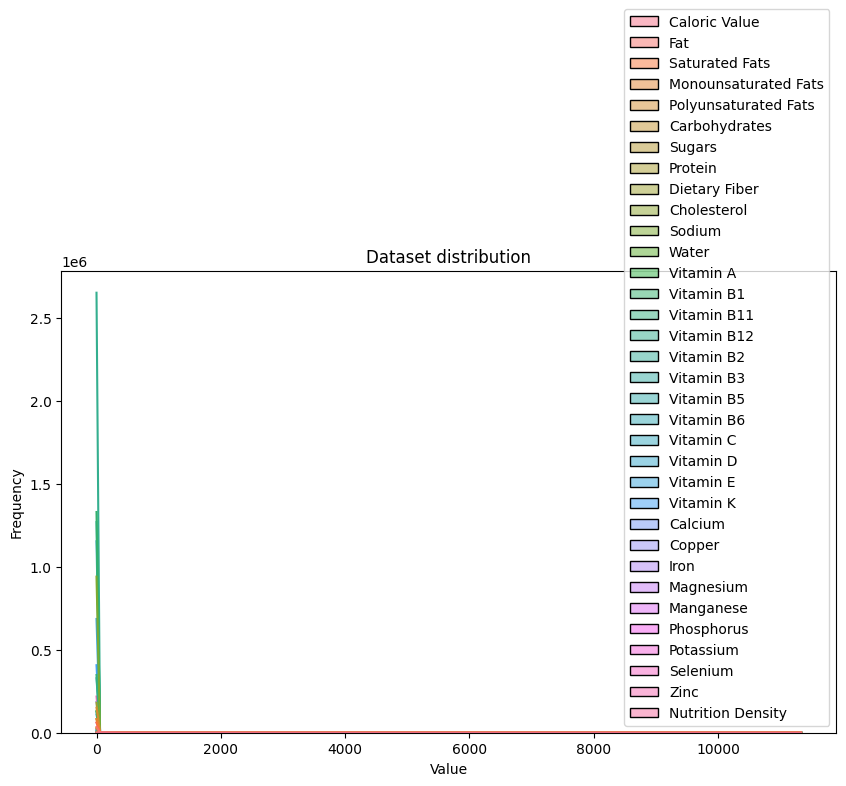

In [7]:
#Checking dataset distribution
plt.figure(figsize=(10, 6))
sns.histplot(food_data, kde=True, bins=35, color='blue')
plt.title('Dataset distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

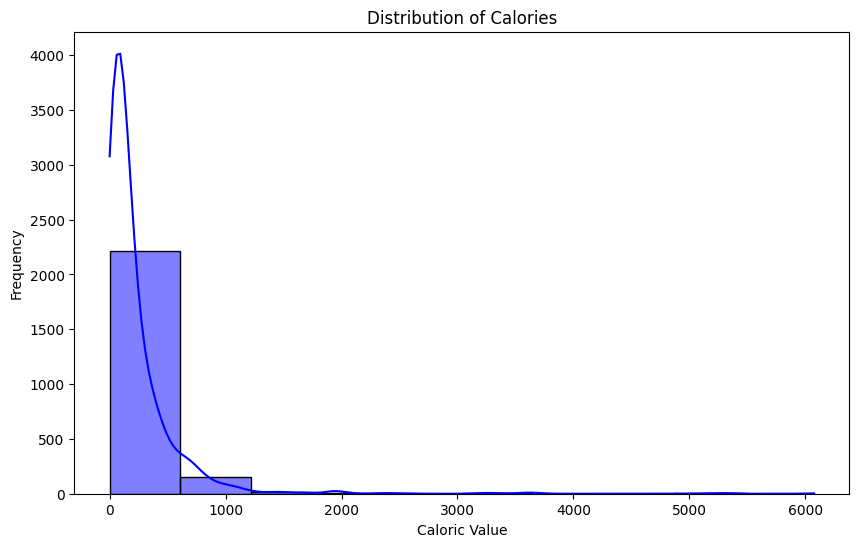

In [9]:
#Checking distribution of Calories
plt.figure(figsize=(10, 6))
sns.histplot(food_data['Caloric Value'], kde=True, bins=10, color='blue')
plt.title('Distribution of Calories')
plt.xlabel('Caloric Value')
plt.ylabel('Frequency')
plt.show()

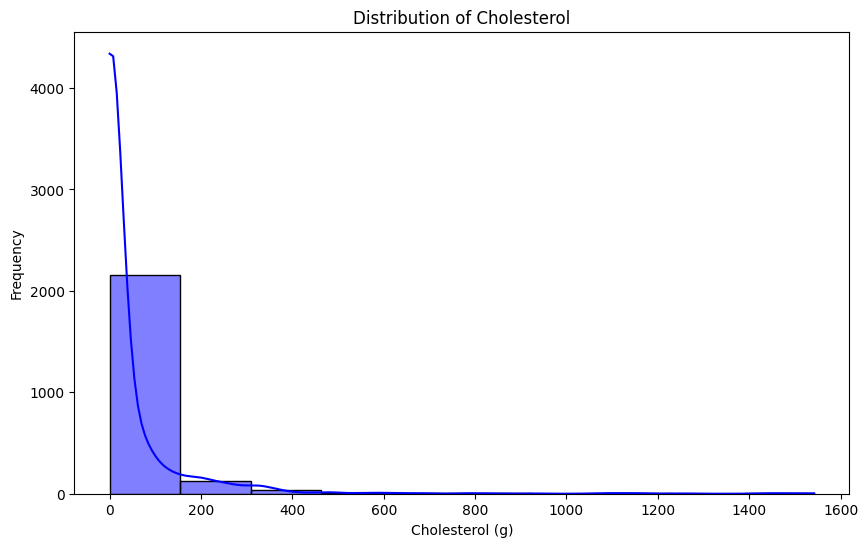

In [38]:
#Checking distribution of Cholesterol
plt.figure(figsize=(10, 6))
sns.histplot(food_data['Cholesterol'], kde=True, bins=10, color='blue')
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol (g)')
plt.ylabel('Frequency')
plt.show()

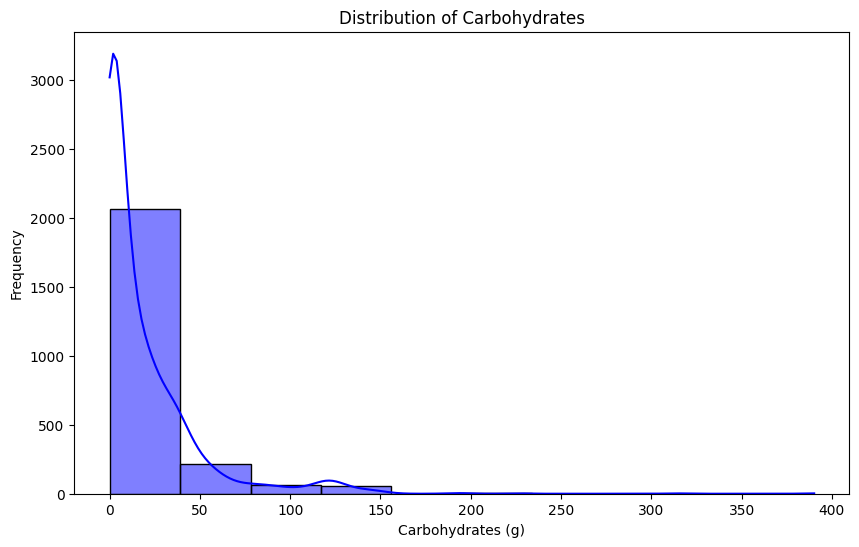

In [10]:
#Checking distribution of Carbohydrates
plt.figure(figsize=(10, 6))
sns.histplot(food_data['Carbohydrates'], kde=True, bins=10, color='blue')
plt.title('Distribution of Carbohydrates')
plt.xlabel('Carbohydrates (g)')
plt.ylabel('Frequency')
plt.show()

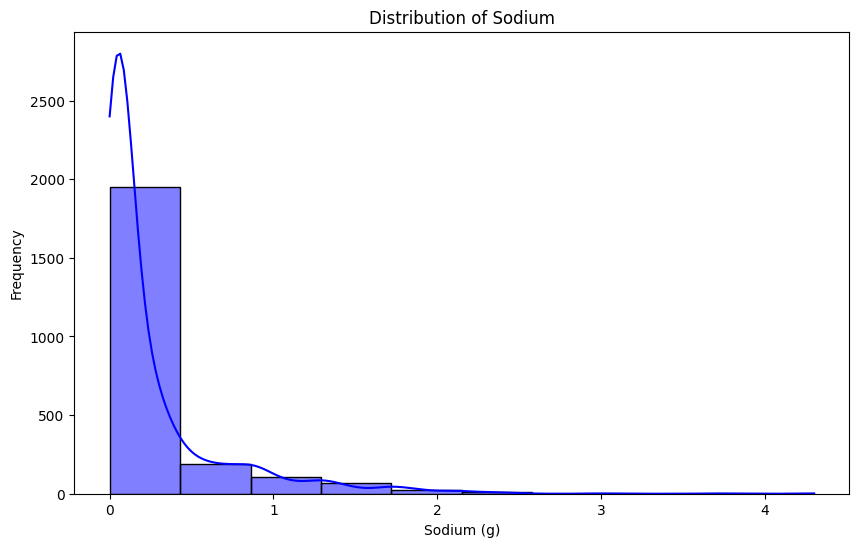

In [40]:
#Checking distribution of Sodium
plt.figure(figsize=(10, 6))
sns.histplot(food_data['Sodium'], kde=True, bins=10, color='blue')
plt.title('Distribution of Sodium')
plt.xlabel('Sodium (g)')
plt.ylabel('Frequency')
plt.show()

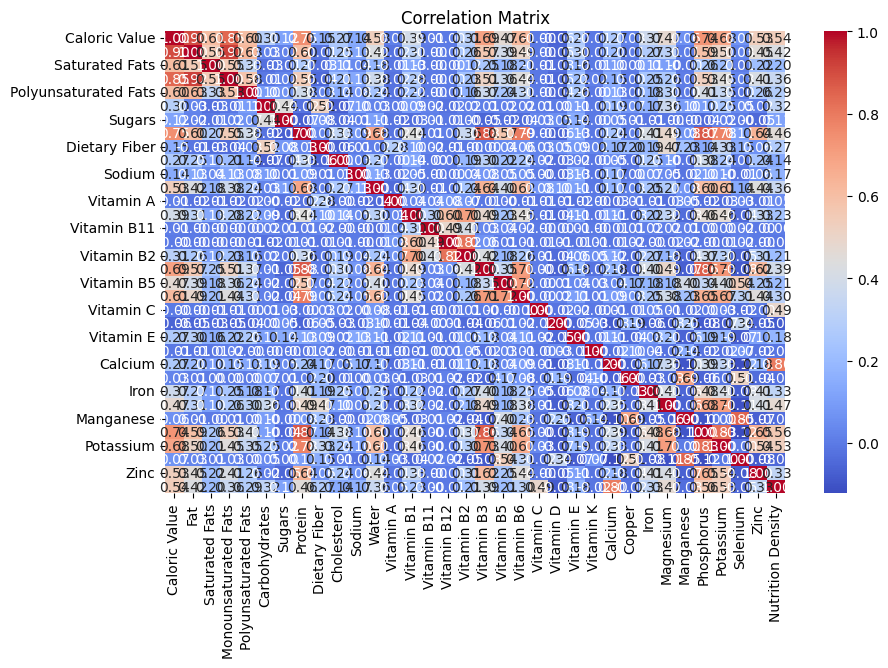

In [12]:
#Selecting only numerical features for correlation
numerical_features = food_data.select_dtypes(include=np.number).columns

#Correlation matrix for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(food_data[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

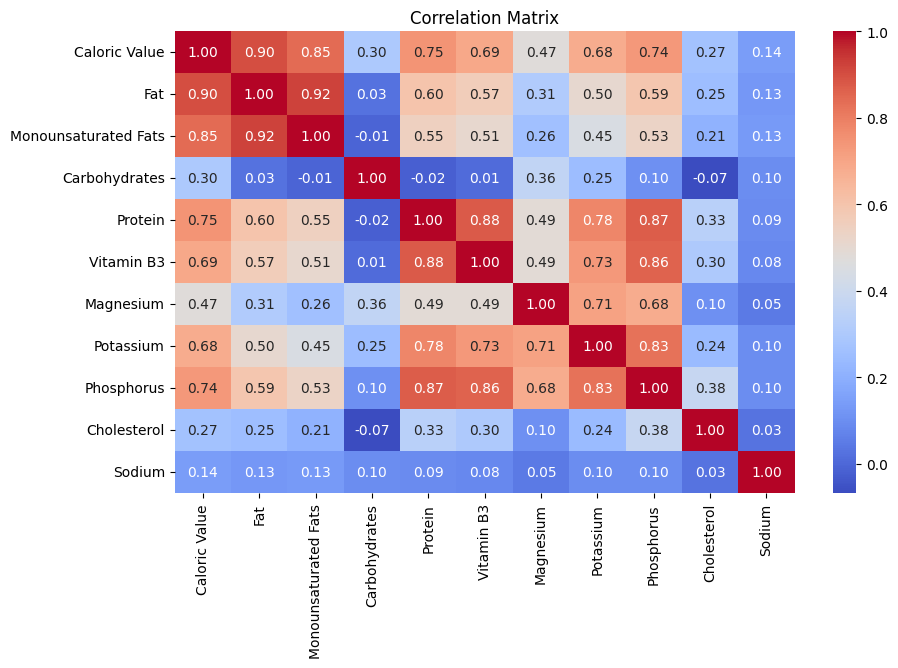

In [8]:
#Selecting columns
numerical_features_filtered = ['Caloric Value', 'Fat', 'Monounsaturated Fats', 'Carbohydrates', 'Protein', 'Vitamin B3', 'Magnesium', 'Potassium', 'Phosphorus', 'Cholesterol', 'Sodium']

#Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(food_data[numerical_features_filtered].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

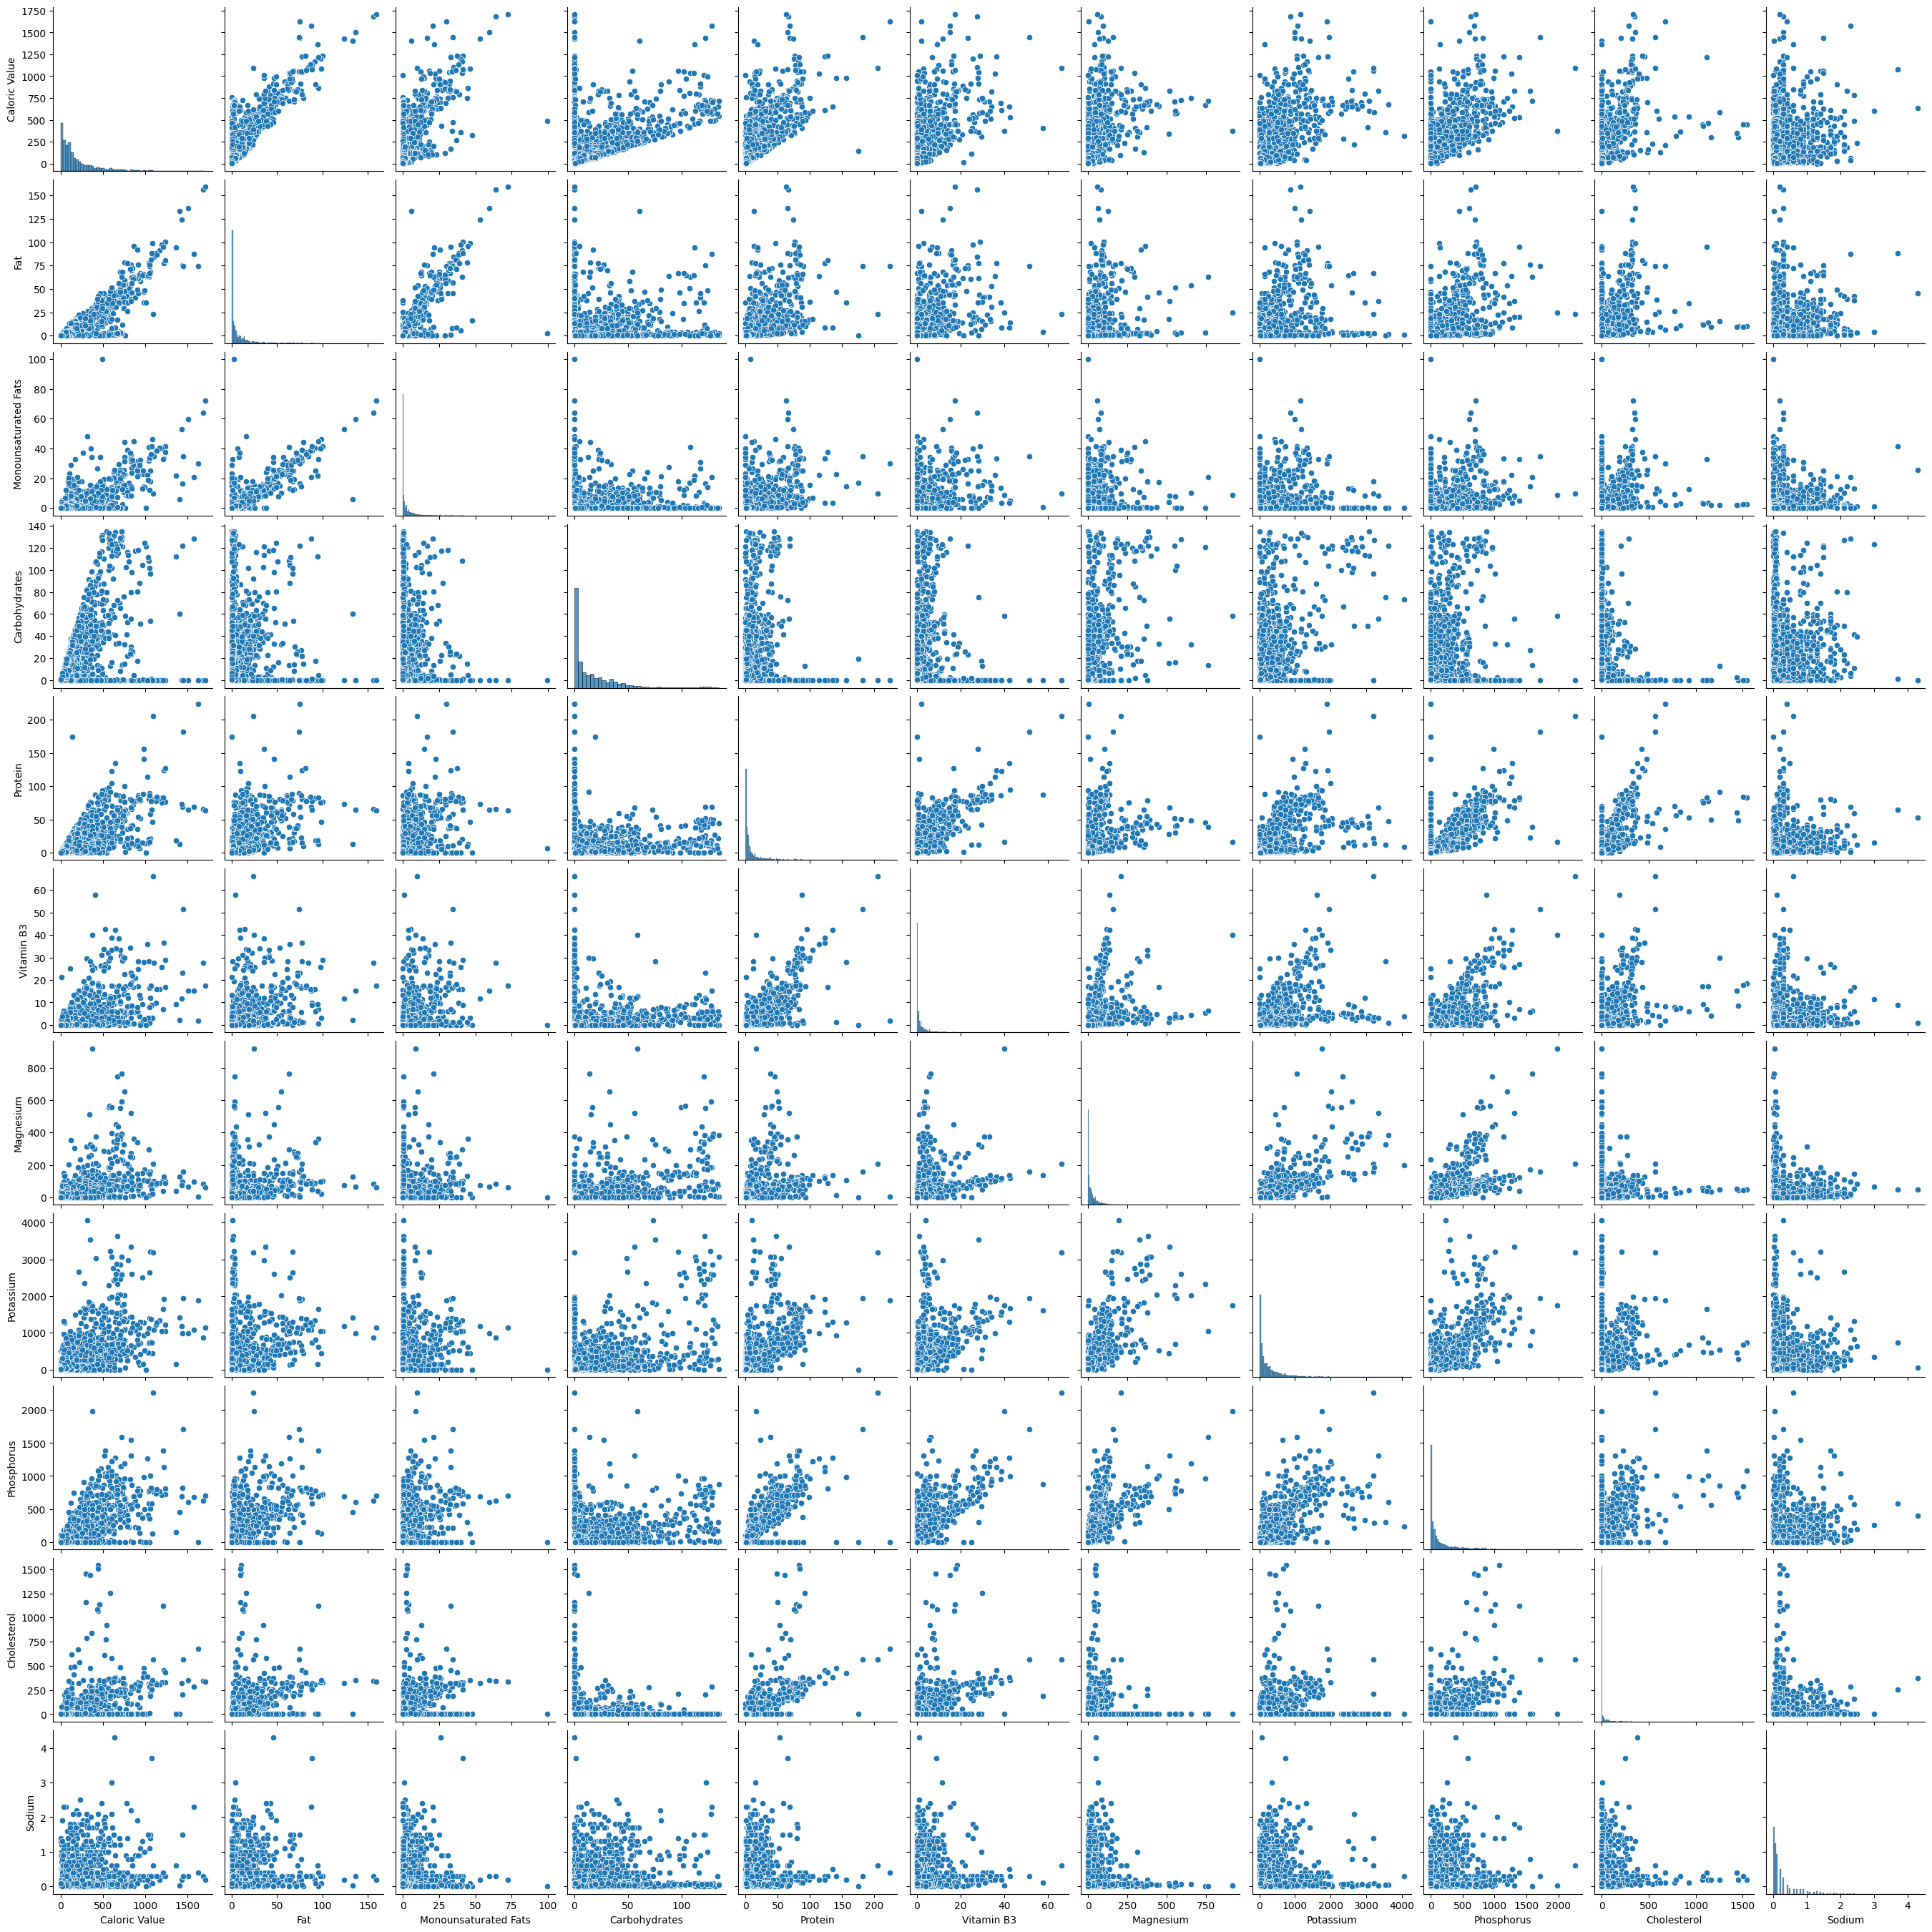

In [59]:
#Constructing pair plot of selected features
sns.pairplot(food_data[numerical_features_filtered])
plt.show()

In [9]:
#Calculating zscore for selected columns
from scipy.stats import zscore
z_scores = food_data[numerical_features_filtered].apply(zscore)
outliers_3 = (z_scores.abs() > 3).sum()
print(outliers_3)

Caloric Value           32
Fat                     28
Monounsaturated Fats    28
Carbohydrates           77
Protein                 23
Vitamin B3              42
Magnesium               56
Potassium               38
Phosphorus              29
Cholesterol             16
Sodium                   7
dtype: int64


In [10]:
#Assesing threshold value
outliers_4 = (z_scores.abs() > 4).sum()
print(outliers_4)

Caloric Value           23
Fat                     23
Monounsaturated Fats    19
Carbohydrates           18
Protein                 17
Vitamin B3              21
Magnesium               37
Potassium               23
Phosphorus              14
Cholesterol              7
Sodium                   5
dtype: int64


In [11]:
#Deleting outliers with zscore higher then 4 to ensure deleting only outliers
outliers_indices = (z_scores.abs() > 4).any(axis=1)
food_data = food_data[~outliers_indices]

In [12]:
#Checking whether the outliers got deleted
food_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2292 entries, 0 to 2394
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   food                  2292 non-null   object 
 1   Caloric Value         2292 non-null   int64  
 2   Fat                   2292 non-null   float64
 3   Saturated Fats        2292 non-null   float64
 4   Monounsaturated Fats  2292 non-null   float64
 5   Polyunsaturated Fats  2292 non-null   float64
 6   Carbohydrates         2292 non-null   float64
 7   Sugars                2292 non-null   float64
 8   Protein               2292 non-null   float64
 9   Dietary Fiber         2292 non-null   float64
 10  Cholesterol           2292 non-null   float64
 11  Sodium                2292 non-null   float64
 12  Water                 2292 non-null   float64
 13  Vitamin A             2292 non-null   float64
 14  Vitamin B1            2292 non-null   float64
 15  Vitamin B11           2292

In [60]:
#Checking for the missing values
food_data.isna().sum()

,0
food,0
Caloric Value,0
Fat,0
Saturated Fats,0
Monounsaturated Fats,0
Polyunsaturated Fats,0
Carbohydrates,0
Sugars,0
Protein,0
Dietary Fiber,0


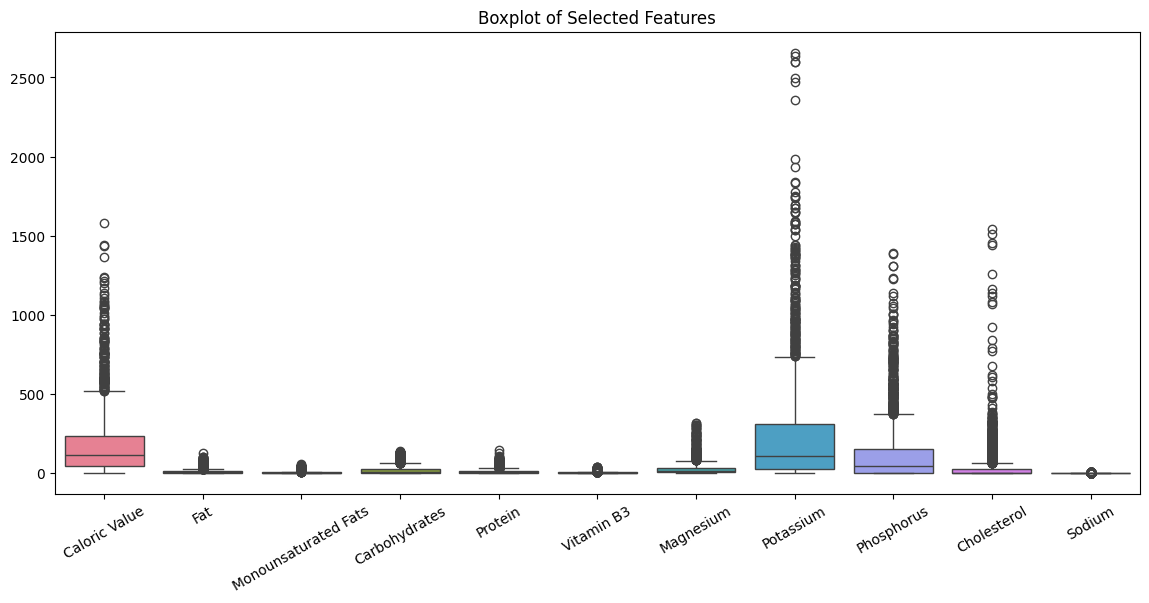

In [25]:
#Visualizing data distribution in the selected columns
plt.figure(figsize=(14, 6))
sns.boxplot(data=food_data[numerical_features_filtered])
plt.xticks(rotation=30)
plt.title('Boxplot of Selected Features')
plt.show()

In [27]:
#Checking descriptive stastics of selected columns
food_data[numerical_features_filtered].describe()

,Caloric Value,Fat,Monounsaturated Fats,Carbohydrates,Protein,Vitamin B3,Magnesium,Potassium,Phosphorus,Cholesterol,Sodium
count,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.00000
mean,177.549302,7.376518,3.018067,16.693376,10.492217,2.250003,25.658705,238.235726,121.295665,39.204707,0.25797
std,204.460087,13.622456,6.205126,23.786087,17.731393,4.556466,41.198518,340.259668,196.291910,116.067993,0.41538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,42.000000,0.300000,0.053000,0.575000,0.700000,0.072750,1.400000,26.175000,0.700000,0.000000,0.03500
50%,110.000000,1.900000,0.500000,6.700000,3.200000,0.500000,9.750000,104.000000,39.500000,0.000000,0.08500
75%,232.000000,8.800000,3.000000,24.100000,11.400000,2.100000,31.700000,309.775000,148.400000,24.600000,0.30000
max,1578.000000,123.800000,53.000000,134.800000,140.800000,34.300000,313.700000,2656.700000,1386.800000,1542.200000,4.30000


In [28]:
#Checking variance of selected columns
food_data[numerical_features_filtered].var()

,0
Caloric Value,41803.927293
Fat,185.571321
Monounsaturated Fats,38.503586
Carbohydrates,565.777945
Protein,314.402291
Vitamin B3,20.761381
Magnesium,1697.317851
Potassium,115776.641989
Phosphorus,38530.514055
Cholesterol,13471.778886


In [62]:
#Getting an overview of values in selected columns
food_data[numerical_features_filtered].head()

,Caloric Value,Fat,Monounsaturated Fats,Carbohydrates,Protein,Vitamin B3,Magnesium,Potassium,Phosphorus,Cholesterol,Sodium
0,51,5.0,1.3,0.8,0.9,0.084,0.027,15.5,0.091,14.6,0.016
1,215,19.4,4.9,3.1,7.8,0.200,8.500,129.2,117.300,62.9,0.300
2,49,3.6,0.9,0.9,0.8,0.000,0.000,0.0,0.000,0.0,0.000
3,30,2.0,0.5,1.5,1.5,0.041,0.096,30.8,0.024,9.8,0.017
4,30,2.3,0.6,1.2,1.2,0.080,1.200,37.1,22.800,8.1,0.046


In [13]:
#Connecting columns food with selected numerical columns
data_filtered = food_data[numerical_features_filtered]
data_filtered= pd.concat([food_data['food'], data_filtered], axis=1)
data_filtered

,food,Caloric Value,Fat,Monounsaturated Fats,Carbohydrates,Protein,Vitamin B3,Magnesium,Potassium,Phosphorus,Cholesterol,Sodium
0,cream cheese,51,5.000,1.300,0.8,0.900,0.084,0.027,15.5,0.091,14.6,0.016
1,neufchatel cheese,215,19.400,4.900,3.1,7.800,0.200,8.500,129.2,117.300,62.9,0.300
2,requeijao cremoso light catupiry,49,3.600,0.900,0.9,0.800,0.000,0.000,0.0,0.000,0.0,0.000
3,ricotta cheese,30,2.000,0.500,1.5,1.500,0.041,0.096,30.8,0.024,9.8,0.017
4,cream cheese low fat,30,2.300,0.600,1.2,1.200,0.080,1.200,37.1,22.800,8.1,0.046
...,...,...,...,...,...,...,...,...,...,...,...,...
2390,jews ear,25,0.095,0.000,6.7,0.500,0.012,24.800,42.6,13.900,0.0,0.027
2391,enoki mushrooms,1,0.099,0.000,0.2,0.062,0.021,0.034,3.2,0.015,0.0,0.084
2392,morel mushrooms,4,0.070,0.031,0.7,0.400,0.008,1.600,25.0,0.060,0.0,0.080
2393,portabella mushrooms raw,19,0.300,0.016,3.3,1.800,3.900,0.000,313.0,92.900,0.0,0.014


#Classifying foods in order to fulfill dietary resctricitons, in this case Diabetes, Low-sodium and Cholesterol-restricted diets

In [31]:
#Printing averages of selected columns to get a perspective about the values
print('Average carbohydrates value:', data_filtered['Carbohydrates'].mean())
print('Average cholesterol value:', data_filtered['Cholesterol'].mean())
print('Average sodium value:', data_filtered['Sodium'].mean())

Average carbohydrates value: 16.69337565445026
Average cholesterol value: 39.2047072425829
Average sodium value: 0.25797033158813265


In [14]:
#Setting thresholds for each dietary resctriction
carbohydrates_threshold = 15
cholesterol_threshold = 0.1
sodium_threshold = 0.15

In [15]:
#Creating columns for every food considering every set restriction
data_filtered['Low_carbohydrates'] = np.where(data_filtered['Carbohydrates'] <= carbohydrates_threshold, True, False)
data_filtered['Low_sodium'] = np.where(data_filtered['Sodium'] <= sodium_threshold, True, False)
data_filtered['Low_cholesterol'] = np.where(data_filtered['Cholesterol'] <= cholesterol_threshold, True, False)

In [16]:
#Importing standard scaler and scaling data to achieve equality in values of different columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
#Scaling selected numerical features
data_scaled = scaler.fit_transform(data_filtered[numerical_features_filtered])

In [18]:
#Checking the scaled features
pd.DataFrame(data_scaled, columns=numerical_features_filtered).head()

,Caloric Value,Fat,Monounsaturated Fats,Carbohydrates,Protein,Vitamin B3,Magnesium,Potassium,Phosphorus,Cholesterol,Sodium
0,-0.619079,-0.174494,-0.276939,-0.668325,-0.541092,-0.475473,-0.622287,-0.654748,-0.617606,-0.212032,-0.582655
1,0.183209,0.882815,0.303353,-0.571609,-0.151867,-0.450009,-0.416579,-0.320519,-0.020360,0.204195,0.101206
2,-0.628863,-0.277288,-0.341416,-0.664120,-0.546733,-0.493912,-0.622942,-0.700311,-0.618070,-0.337847,-0.621182
3,-0.721811,-0.394767,-0.405893,-0.638890,-0.507246,-0.484912,-0.620612,-0.609773,-0.617948,-0.253396,-0.580247
4,-0.721811,-0.372739,-0.389774,-0.651505,-0.524169,-0.476351,-0.593809,-0.591253,-0.501891,-0.268045,-0.510416


In [19]:
#Calculating magnitute of vectors
magnitudes = np.linalg.norm(data_scaled, axis=1)
pd.DataFrame(magnitudes, columns=['Magnitudes']).describe()

,Magnitudes
count,2292.000000
mean,2.553136
std,2.117416
min,0.533513
25%,1.512741
50%,1.793940
75%,2.459289
max,15.959637


In [40]:
#Checking descriptive statistics of scaled data
pd.DataFrame(data_scaled, columns=numerical_features_filtered).describe()

,Caloric Value,Fat,Monounsaturated Fats,Carbohydrates,Protein,Vitamin B3,Magnesium,Potassium,Phosphorus,Cholesterol,Sodium
count,2.292000e+03,2.292000e+03,2.292000e+03,2.292000e+03,2.292000e+03,2.292000e+03,2.292000e+03,2.292000e+03,2.292000e+03,2.292000e+03,2.292000e+03
mean,2.480079e-17,6.200198e-17,2.480079e-17,1.240040e-17,-4.960159e-17,6.200198e-17,-9.300298e-17,-9.300298e-17,-2.480079e-17,1.240040e-17,-6.200198e-17
std,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00
min,-8.685707e-01,-5.416151e-01,-4.864891e-01,-7.019657e-01,-5.918603e-01,-4.939123e-01,-6.229424e-01,-7.003114e-01,-6.180700e-01,-3.378473e-01,-6.211824e-01
25%,-6.631068e-01,-5.195878e-01,-4.779459e-01,-6.777867e-01,-5.523736e-01,-4.779425e-01,-5.889532e-01,-6.233680e-01,-6.145031e-01,-3.378473e-01,-5.369038e-01
50%,-3.304510e-01,-4.021091e-01,-4.058929e-01,-4.202270e-01,-4.113500e-01,-3.841542e-01,-3.862318e-01,-3.945957e-01,-4.167951e-01,-3.378473e-01,-4.165057e-01
75%,2.663727e-01,1.045180e-01,-2.912291e-03,3.114527e-01,5.120753e-02,-3.292820e-02,1.466706e-01,2.102949e-01,1.381119e-01,-1.258564e-01,1.012058e-01
max,6.851001e+00,8.548303e+00,8.056700e+00,4.966449e+00,7.350591e+00,7.035495e+00,6.993071e+00,7.109253e+00,6.448460e+00,1.295209e+01,9.733048e+00


In [1]:
#Checking variance of scaled data
pd.DataFrame(data_scaled, columns=numerical_features_filtered).var()

NameError: name 'pd' is not defined

In [20]:
#Combining scaled data with food, low_carbohydrates, low_sodium, low_cholesterol columns
scaled_df = pd.DataFrame(data_scaled, columns=numerical_features_filtered)

#Reseting indeces before combining to ensure both dataframes have same indices
data_filtered_reset = data_filtered.reset_index(drop=True)
scaled_df_reset = scaled_df.reset_index(drop=True)

#Combining dataframes
scaled_df = pd.concat([data_filtered_reset[['food', 'Low_carbohydrates', 'Low_sodium', 'Low_cholesterol']], scaled_df_reset], axis=1)
scaled_df

,food,Low_carbohydrates,Low_sodium,Low_cholesterol,Caloric Value,Fat,Monounsaturated Fats,Carbohydrates,Protein,Vitamin B3,Magnesium,Potassium,Phosphorus,Cholesterol,Sodium
0,cream cheese,True,True,False,-0.619079,-0.174494,-0.276939,-0.668325,-0.541092,-0.475473,-0.622287,-0.654748,-0.617606,-0.212032,-0.582655
1,neufchatel cheese,True,False,False,0.183209,0.882815,0.303353,-0.571609,-0.151867,-0.450009,-0.416579,-0.320519,-0.020360,0.204195,0.101206
2,requeijao cremoso light catupiry,True,True,True,-0.628863,-0.277288,-0.341416,-0.664120,-0.546733,-0.493912,-0.622942,-0.700311,-0.618070,-0.337847,-0.621182
3,ricotta cheese,True,True,False,-0.721811,-0.394767,-0.405893,-0.638890,-0.507246,-0.484912,-0.620612,-0.609773,-0.617948,-0.253396,-0.580247
4,cream cheese low fat,True,True,False,-0.721811,-0.372739,-0.389774,-0.651505,-0.524169,-0.476351,-0.593809,-0.591253,-0.501891,-0.268045,-0.510416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,jews ear,True,True,True,-0.746271,-0.534640,-0.486489,-0.420227,-0.563656,-0.491278,-0.020848,-0.575086,-0.547242,-0.337847,-0.556167
2288,enoki mushrooms,True,True,True,-0.863679,-0.534346,-0.486489,-0.693556,-0.588363,-0.489302,-0.622117,-0.690905,-0.617994,-0.337847,-0.418914
2289,morel mushrooms,True,True,True,-0.849003,-0.536475,-0.481492,-0.672530,-0.569296,-0.492156,-0.584098,-0.626822,-0.617764,-0.337847,-0.428546
2290,portabella mushrooms raw,True,True,True,-0.775623,-0.519588,-0.483910,-0.563199,-0.490323,0.362201,-0.622942,0.219775,-0.144692,-0.337847,-0.587471


#Recommendation system

In [21]:
#Importing euclidean distances
from sklearn.metrics.pairwise import euclidean_distances

In [22]:
#Calculating euclidean distances and constructing euclidean matrix
euclidean_matrix = euclidean_distances(data_scaled)
euclidean_matrix.shape

(2292, 2292)

#Creating a recommendation function taking into consideration dietary restrictions

In [23]:
#Creating an empy list of remmended foods to later store the recommendations
recommended_foods_list = []

def recommender_food_restrictions(food, n_recs, restrictions=None):
    #Checking if the food exists in the dataset
    if food in list(scaled_df['food']):
        #Indexing of the selected food
        ix = scaled_df[scaled_df['food'] == food].index[0]

        #Filtering dataset based on restrictions, if provided
        if restrictions:
            # Applying all specified restrictions
            valid_foods = scaled_df
            for restriction in restrictions:
                if restriction in ['Low_sodium', 'Low_cholesterol', 'Low_carbohydrates']:
                    valid_foods = valid_foods[valid_foods[restriction] == True]
        else:
            valid_foods = scaled_df

        #Finding the indices of the valid foods in the original DataFrame
        valid_indices = valid_foods.index.tolist()

        #Computing distances only for valid foods
        distances = [(i, euclidean_matrix[ix, i]) for i in valid_indices if i != ix]
        distances = sorted(distances, key=lambda x: x[1])[:n_recs]

        #Returning the names of the recommended foods
        recommended_foods_list.clear()
        recommended_foods_list.extend([scaled_df.iloc[i]['food'] for i, _ in distances])
        return recommended_foods_list
    else:
        return 'Food not in the dataset'

In [60]:
#Testing the recommender_food_restrictions function
recommender_food_restrictions('flour tortilla', 3, restrictions=['Low_cholesterol'])

['focaccia', 'vegetable egg roll', 'rye dinner roll']

In [61]:
#Checking whether there are ingredients in the recommended_foods_list
recommended_foods_list

['focaccia', 'vegetable egg roll', 'rye dinner roll']

#Taking the ingredients and creating a meal ideas using LM


In [26]:
#Installing transformers for LLM implementation
!pip install transformers

In [67]:
from transformers import pipeline

#Loading a pre-trained text generation pipeline
model_small = pipeline("text2text-generation", model="google/flan-t5-small")

def generate_recipe_1(recommended_foods_list):
    prompt = (
        'Your assignment is to develop a recipe and provide step-by-step instructions for this recipe. '
        'This recipe should be crafted using at least one of the ingredients from this list: ' + ','.join(map(str, recommended_foods_list))
    )

    response_1 = model_small(prompt, max_length=150, num_return_sequences=1)
    return response_1[0]["generated_text"]

recipe_1 = generate_recipe_1(recommended_foods_list)


In [68]:
#Loading a pre-trained text generation pipeline
model_base = pipeline("text2text-generation", model="google/flan-t5-base")

def generate_recipe_2(recommended_foods_list):
    prompt = (
        'Your assignment is to develop a recipe and provide step-by-step instructions for this recipe. '
        'This recipe should be crafted using at least one of the ingredients from this list: ' + ','.join(map(str, recommended_foods_list))
    )

    response_2 = model_base(prompt, max_length=150, num_return_sequences=1)
    return response_2[0]["generated_text"]

recipe_2 = generate_recipe_2(recommended_foods_list)

In [69]:
#Loading a pre-trained text generation pipeline
model_large = pipeline("text2text-generation", model="google/flan-t5-large")

def generate_recipe_3(recommended_foods_list):
    prompt = (
        'Your assignment is to develop a recipe and provide step-by-step instructions for this recipe. '
        'This recipe should be crafted using at least one of the ingredients from this list: ' + ','.join(map(str, recommended_foods_list))
    )

    response_3 = model_large(prompt, max_length=150, num_return_sequences=1)
    return response_3[0]["generated_text"]

recipe_3 = generate_recipe_3(recommended_foods_list)

In [70]:
#Loading a pre-trained text generation pipeline
model_xl = pipeline("text2text-generation", model="google/flan-t5-xl")

def generate_recipe_4(recommended_foods_list):
    prompt = (
        'Your assignment is to develop a recipe and provide step-by-step instructions for this recipe. '
        'This recipe should be crafted using at least one of the ingredients from this list: ' + ','.join(map(str, recommended_foods_list))
    )
    response_4 = model_xl(prompt, max_length=150, num_return_sequences=1)
    return response_4[0]["generated_text"]

recipe_4 = generate_recipe_4(recommended_foods_list)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [71]:
#Printing all of the generated recipes
print("Recipe 1:", recipe_1)
print("Recipe 2:", recipe_2)
print("Recipe 3:", recipe_3)
print("Recipe 4:", recipe_4)

Recipe 1: To make a chicken rye dinner roll, you will need to make a large egg roll. You will need to make a large egg roll. You will need to make a large egg roll. You will need to make a large egg roll. You will need to make a large egg roll. You will need to make a large egg roll. You will need to make a large egg roll. You will need to make a large egg roll. You will need to make a large egg roll. You will need to make a large egg roll. You will need to make a large egg roll. You will need to make a large egg roll. You will need to make 
Recipe 2: Baked Potatoes, Egg Rolls, and a Tomato Salad
Recipe 3: To make this recipe, you will need: 1 pound vegetable egg roll, 1 pound vegetable focaccia, 1 pound rye dinner roll, 1 pound vegetable egg roll, 1 pound vegetable egg roll, 1 pound vegetable egg roll, 1 pound vegetable egg roll, 1 pound vegetable egg roll, 1 pound vegetable egg roll, 1 pound vegetable egg roll, 1 pound vegetable egg roll, 1 pound vegetable egg roll, 1 pound vegetable